In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
one_dim = torch.linspace(-2, 2, 10)
two_dim = torch.unsqueeze(one_dim, dim=1)
print one_dim
print two_dim

tensor([-2.0000, -1.5556, -1.1111, -0.6667, -0.2222,  0.2222,  0.6667,  1.1111,
         1.5556,  2.0000])
tensor([[-2.0000],
        [-1.5556],
        [-1.1111],
        [-0.6667],
        [-0.2222],
        [ 0.2222],
        [ 0.6667],
        [ 1.1111],
        [ 1.5556],
        [ 2.0000]])


In [3]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size()) #noise

x, y = Variable(x), Variable(y)

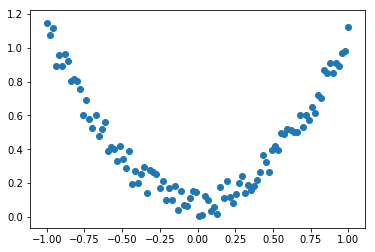

In [4]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [5]:
class Net(torch.nn.Module): # Remember to inherit torch.nn.Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__() # official step
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [6]:
net = Net(1, 10, 1)
print net

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [7]:
plt.ion() # something about plotting
plt.show()

In [8]:
optimizer = torch.optim.SGD(net.parameters(), lr = 0.5)
loss_func = torch.nn.MSELoss()

/home/arg_ws3/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


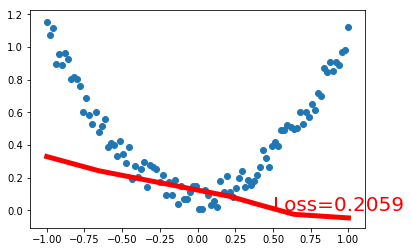

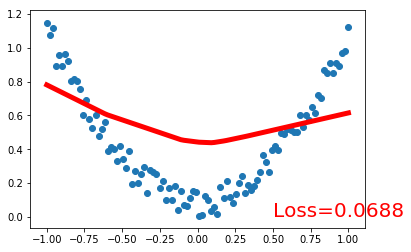

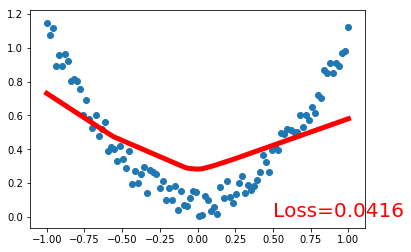

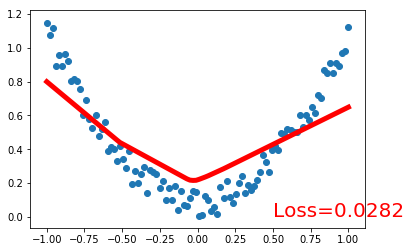

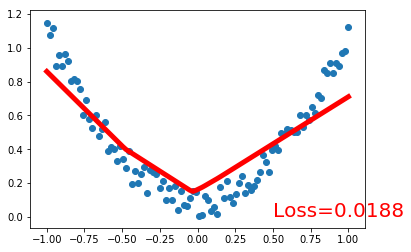

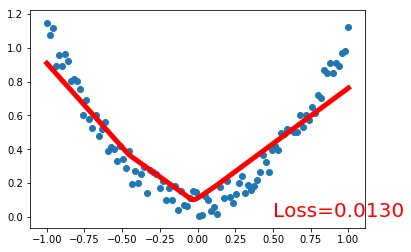

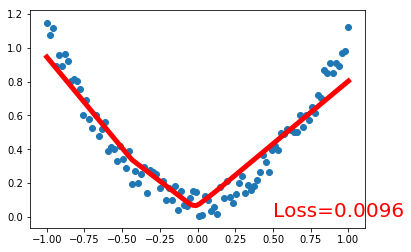

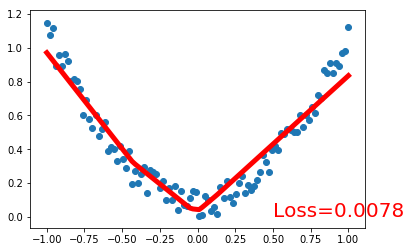

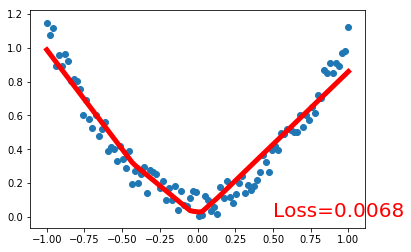

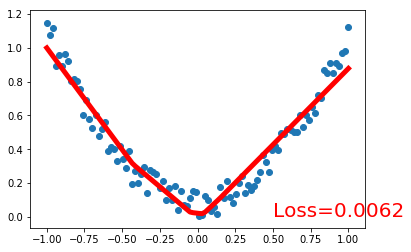

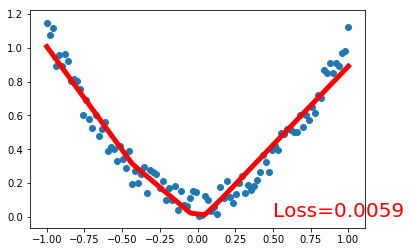

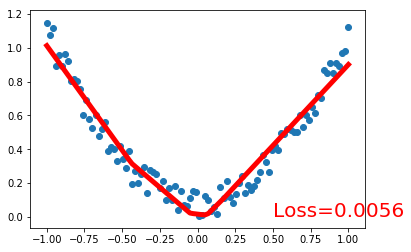

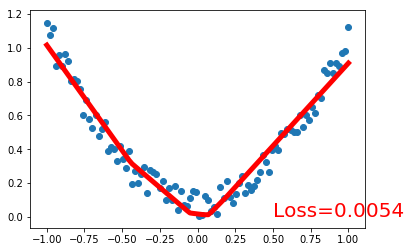

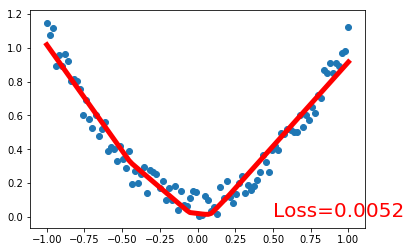

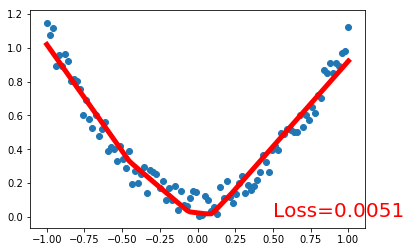

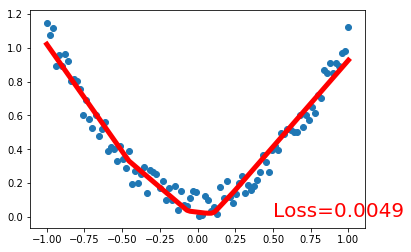

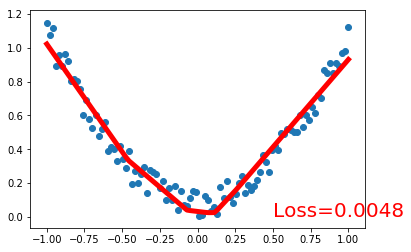

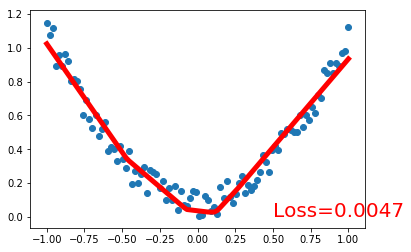

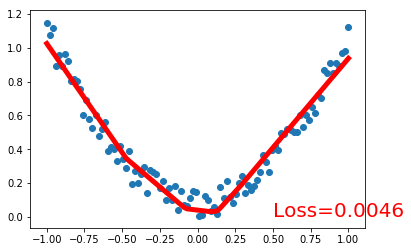

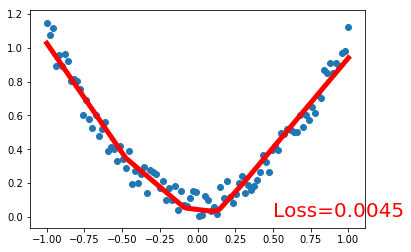

In [9]:
for t in range(100):
    prediction = net(x)
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    '''if t % 5 == 0:
        print loss.data[0]'''
    if t % 5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw = 5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color': 'red'})
        plt.show()
        plt.pause(0.1)
plt.ioff()